In [1]:
import os
import yaml
import json
import joblib
from loguru import logger
from plot_shap import get_data_for_Shap, get_shap_values
from train_shap import get_model_data_for_shap, ModelReversingY

SHAPFOLDER = 'shap'
config_path = 'trainshap_timeseries.yaml'
with open(config_path, 'r') as file:
    config = yaml.safe_load(file)
featurelist = config['train']['feature_list']
TOPN = featurelist.split('/')[-1].split('_')[0]

for expid, seqid in [ ('43KOTlpS', 186)]:
    fmodel, params, pp, fp= get_model_data_for_shap(config_path, expid, seqid)

    key = 'all'
    keyname = 'all'
    rowna = 0.45
    k = 100

    shapdir = f'{SHAPFOLDER}/shap_plots_{keyname}_rowna{rowna}_k{k}_{TOPN}_{expid}'
    
    X, y = get_data_for_Shap(fmodel, fp, params.copy(), 
                            rowna, 
                            pp, k = k, randomrate= 0.2,
                            pick_key= key)
    # SCALED X, y only x is used for shap values
    logger.debug(f"{expid} {seqid} {keyname} {rowna} {k}")
    logger.debug(f"Data shape: {X.shape}, {y.shape}")            
    # shap requires a model receive scaled X and original y
    shap_values, X = get_shap_values(X, ModelReversingY(fmodel, params), 500) 
    print(f"shapdir  {shapdir}")
    print(f"shap_values base value: {shap_values.base_values[0]}")


2024-10-27 15:01:17.274 | INFO     | preprocessor:_dropna:160 - Dropping NaN values
2024-10-27 15:01:17.471 | INFO     | preprocessor:_dropna:184 - Columns with NaN values: Index(['Hematocrit_Avg_preclinical', 'Hematocrit_Avg_acute',
       'Hematocrit_Avg_chronic', 'LymphocytesPercentage_Avg_preclinical',
       'LymphocytesPercentage_Avg_acute', 'LymphocytesPercentage_Avg_chronic',
       'NeutrophilsPercentage_Avg_preclinical',
       'NeutrophilsPercentage_Avg_acute', 'NeutrophilsPercentage_Avg_chronic',
       'MonocytesPercentage_Avg_preclinical',
       ...
       'Crab_Avg_chronic', 'MixedGrasses_Avg_preclinical',
       'MixedGrasses_Avg_acute', 'MixedGrasses_Avg_chronic',
       'Mugwort_Avg_preclinical', 'Mugwort_Avg_acute', 'Mugwort_Avg_chronic',
       'Salmon_Avg_preclinical', 'Salmon_Avg_acute', 'Salmon_Avg_chronic'],
      dtype='object', length=233)
2024-10-27 15:01:17.475 | INFO     | preprocessor:_imputation:196 - Imputing missing values
2024-10-27 15:01:18.357 | INF

[0]	train-rmsle:1.54913	train-loss:228507.51562	validation-rmsle:1.57716	validation-loss:266995.62500
[1]	train-rmsle:1.50132	train-loss:228446.10938	validation-rmsle:1.52873	validation-loss:266927.00000
[2]	train-rmsle:1.45499	train-loss:228377.89062	validation-rmsle:1.48173	validation-loss:266850.71875
[3]	train-rmsle:1.41011	train-loss:228301.90625	validation-rmsle:1.43614	validation-loss:266765.78125


/root/anaconda3/envs/mindsearch/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [15:01:18] WARNING: /workspace/src/context.cc:43: No visible GPU is found, setting device to CPU.
  warnings.warn(smsg, UserWarning)
/root/anaconda3/envs/mindsearch/lib/python3.10/site-packages/xgboost/core.py:158: UserWarning: [15:01:18] WARNING: /workspace/src/context.cc:196: XGBoost is not compiled with CUDA support.
  warnings.warn(smsg, UserWarning)


[4]	train-rmsle:1.36671	train-loss:228217.21875	validation-rmsle:1.39199	validation-loss:266671.09375
[5]	train-rmsle:1.32461	train-loss:228122.06250	validation-rmsle:1.34881	validation-loss:266564.00000
[6]	train-rmsle:1.28434	train-loss:228016.73438	validation-rmsle:1.30771	validation-loss:266446.12500
[7]	train-rmsle:1.24570	train-loss:227899.28125	validation-rmsle:1.26819	validation-loss:266314.71875
[8]	train-rmsle:1.20872	train-loss:227768.34375	validation-rmsle:1.23029	validation-loss:266168.18750
[9]	train-rmsle:1.17345	train-loss:227622.50000	validation-rmsle:1.19405	validation-loss:266004.93750
[10]	train-rmsle:1.13982	train-loss:227459.15625	validation-rmsle:1.15968	validation-loss:265823.43750
[11]	train-rmsle:1.10779	train-loss:227275.62500	validation-rmsle:1.12680	validation-loss:265618.34375
[12]	train-rmsle:1.07778	train-loss:227075.75000	validation-rmsle:1.09553	validation-loss:265393.84375
[13]	train-rmsle:1.04982	train-loss:226856.14062	validation-rmsle:1.06644	valid

2024-10-27 15:01:22.476 | INFO     | preprocessor:_dropna:160 - Dropping NaN values
2024-10-27 15:01:22.645 | INFO     | preprocessor:_dropna:184 - Columns with NaN values: Index(['Hematocrit_Avg_preclinical', 'Hematocrit_Avg_acute',
       'Hematocrit_Avg_chronic', 'LymphocytesPercentage_Avg_preclinical',
       'LymphocytesPercentage_Avg_acute', 'LymphocytesPercentage_Avg_chronic',
       'NeutrophilsPercentage_Avg_preclinical',
       'NeutrophilsPercentage_Avg_acute', 'NeutrophilsPercentage_Avg_chronic',
       'MonocytesPercentage_Avg_preclinical',
       ...
       'Crab_Avg_chronic', 'MixedGrasses_Avg_preclinical',
       'MixedGrasses_Avg_acute', 'MixedGrasses_Avg_chronic',
       'Mugwort_Avg_preclinical', 'Mugwort_Avg_acute', 'Mugwort_Avg_chronic',
       'Salmon_Avg_preclinical', 'Salmon_Avg_acute', 'Salmon_Avg_chronic'],
      dtype='object', length=233)
2024-10-27 15:01:22.649 | INFO     | preprocessor:_imputation:196 - Imputing missing values
2024-10-27 15:01:23.506 | INF

shapdir  shap/shap_plots_all_rowna0.45_k100_top25_43KOTlpS
shap_values base value: 48.10528809547424


In [11]:
import shap
import numpy as np

cohorts = shap.Cohorts(
    coh0_2=shap_values[shap_values[:, "FirstVisitAge"].data <= 2],
    coh2_6=shap_values[(shap_values[:, "FirstVisitAge"].data > 2) & (shap_values[:, "FirstVisitAge"].data <= 6)],
    coh6_12=shap_values[(shap_values[:, "FirstVisitAge"].data > 6) & (shap_values[:, "FirstVisitAge"].data <= 12)],
    coh12_plus=shap_values[shap_values[:, "FirstVisitAge"].data > 12]

)

coh0_2
81.6403501033783


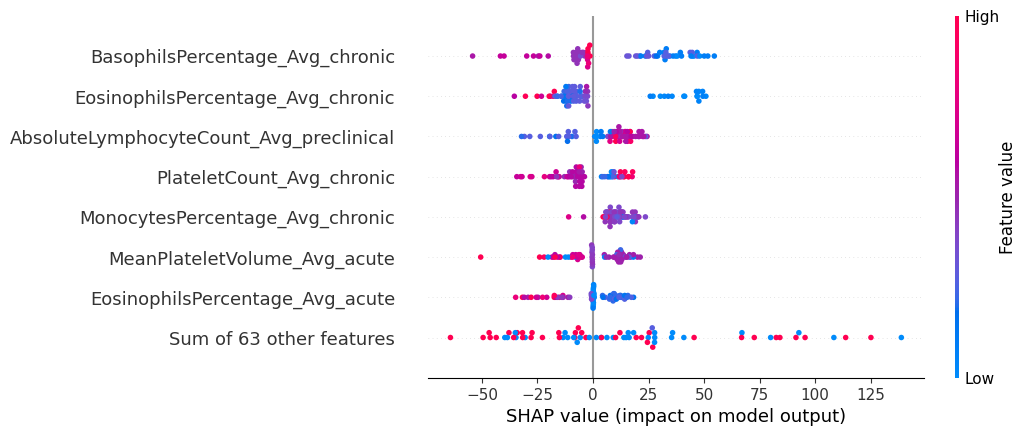

coh2_6
81.6403501033783


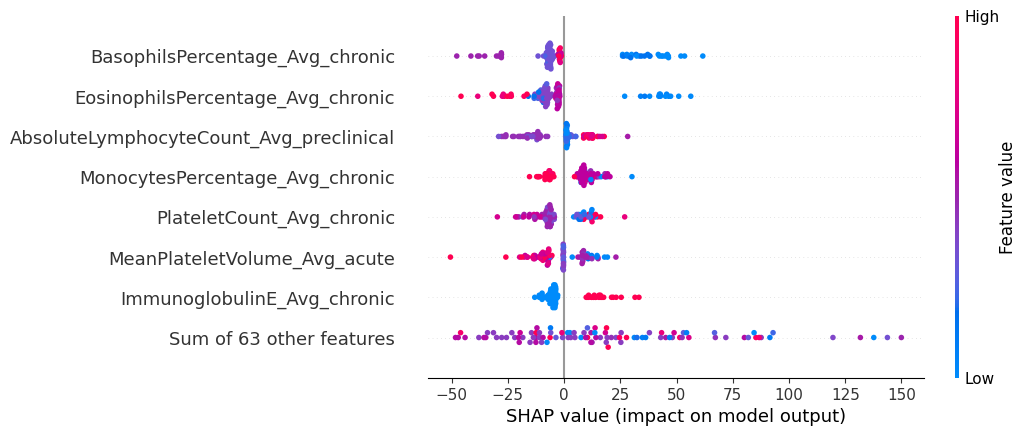

coh6_12
81.6403501033783


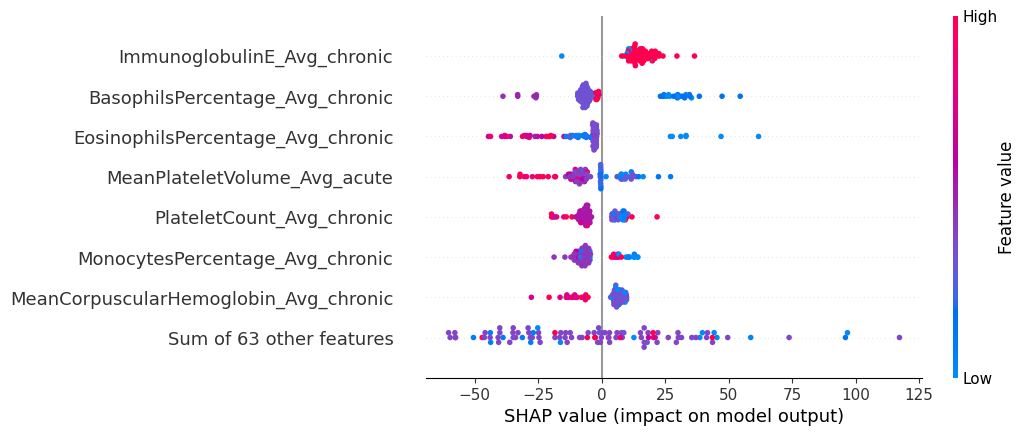

coh12_plus
81.6403501033783


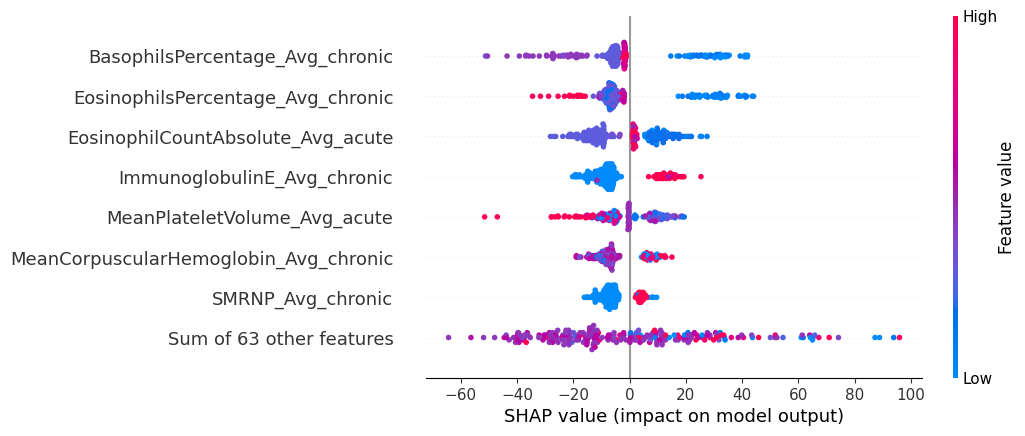

In [14]:
for co in cohorts.cohorts.keys():
    #PRINT BASE VALUES
    print(co)
    print(cohorts.cohorts[co].base_values[0])
    shap.plots.beeswarm(cohorts.cohorts[co], max_display=8)
    

cohorts 单拎出来作为explanation 对象画图是一样的 所以cohorts 的特征值范围是基于自身的 而不是基于整个数据集

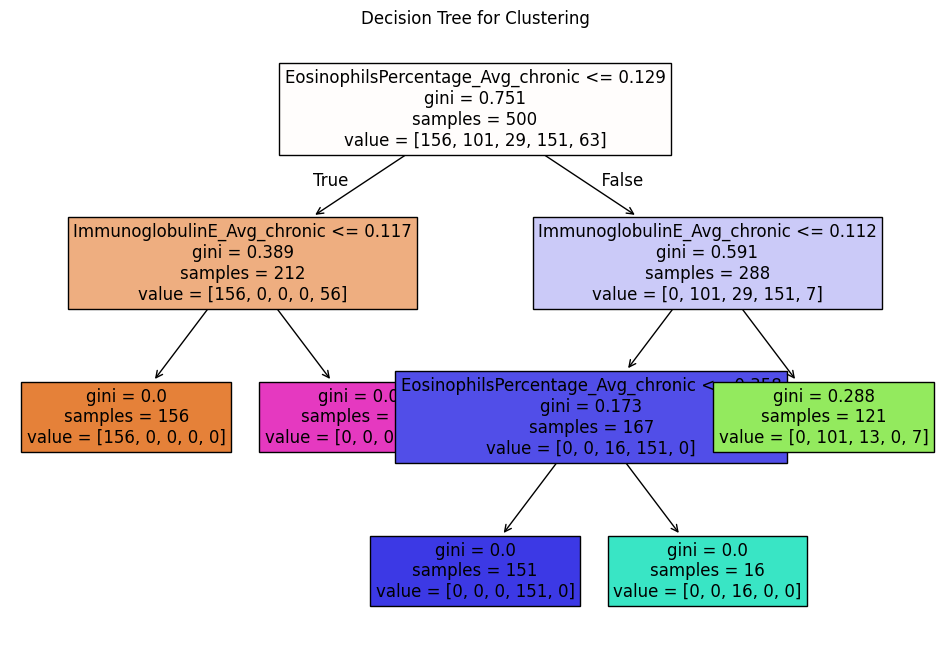

label
0    156
3    151
1    101
4     63
2     29
Name: count, dtype: int64
predicted_cluster
0    156
3    151
1    121
4     56
2     16
Name: count, dtype: int64
|--- EosinophilsPercentage_Avg_chronic <= 0.13
|   |--- ImmunoglobulinE_Avg_chronic <= 0.12
|   |   |--- class: 0
|   |--- ImmunoglobulinE_Avg_chronic >  0.12
|   |   |--- class: 4
|--- EosinophilsPercentage_Avg_chronic >  0.13
|   |--- ImmunoglobulinE_Avg_chronic <= 0.11
|   |   |--- EosinophilsPercentage_Avg_chronic <= 0.36
|   |   |   |--- class: 3
|   |   |--- EosinophilsPercentage_Avg_chronic >  0.36
|   |   |   |--- class: 2
|   |--- ImmunoglobulinE_Avg_chronic >  0.11
|   |   |--- class: 1



In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Sample data (replace with your data)
data = pd.DataFrame(shap_values.data.copy())

features = pd.DataFrame(shap_values[:,['EosinophilsPercentage_Avg_chronic', 'ImmunoglobulinE_Avg_chronic']].data.copy())


# Set pseudo-labels: Use arbitrary labels or clusters to mimic clustering behavior.
# Here we use KMeans to pre-label data into 3 groups.
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=0)
data['label'] = kmeans.fit_predict(features)

# Step 2: Initialize and fit the Decision Tree
clf = DecisionTreeClassifier(max_leaf_nodes=5, random_state=0)
clf.fit(features, data['label'])

# Step 3: Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(clf, 
          feature_names=['EosinophilsPercentage_Avg_chronic', 'ImmunoglobulinE_Avg_chronic'],
          filled=True, fontsize=12)
# set font size
plt.title("Decision Tree for Clustering")
plt.show()

# Step 4: Predict clusters for the data points
data['predicted_cluster'] = clf.predict(features)

print(data['label'].value_counts())
print(data['predicted_cluster'].value_counts())

# print the decision tree
from sklearn.tree import export_text
r = export_text(clf, feature_names=['EosinophilsPercentage_Avg_chronic', 'ImmunoglobulinE_Avg_chronic'])
print(r)


In [4]:
import shap
# cohorts = shap_values.cohorts(3)
# Update conditions to use proper boolean expressions
cohorts = shap.Cohorts(
    cohiib=shap_values[(shap_values[:, "ImmunoglobulinE_Avg_chronic"].data <= 0.12) &
                    (shap_values[:, "EosinophilsPercentage_Avg_chronic"].data <= 0.13)],
    cohna1=shap_values[(shap_values[:, "ImmunoglobulinE_Avg_chronic"].data <= 0.12) &
                    (shap_values[:, "EosinophilsPercentage_Avg_chronic"].data > 0.13)],
    cohna2=shap_values[(shap_values[:, "ImmunoglobulinE_Avg_chronic"].data > 0.12) & 
                     (shap_values[:, "EosinophilsPercentage_Avg_chronic"].data <= 0.13)],
    cohib=shap_values[(shap_values[:, "ImmunoglobulinE_Avg_chronic"].data > 0.12) & 
                     (shap_values[:, "EosinophilsPercentage_Avg_chronic"].data > 0.13)]
)

cohiib
48.10528809547424


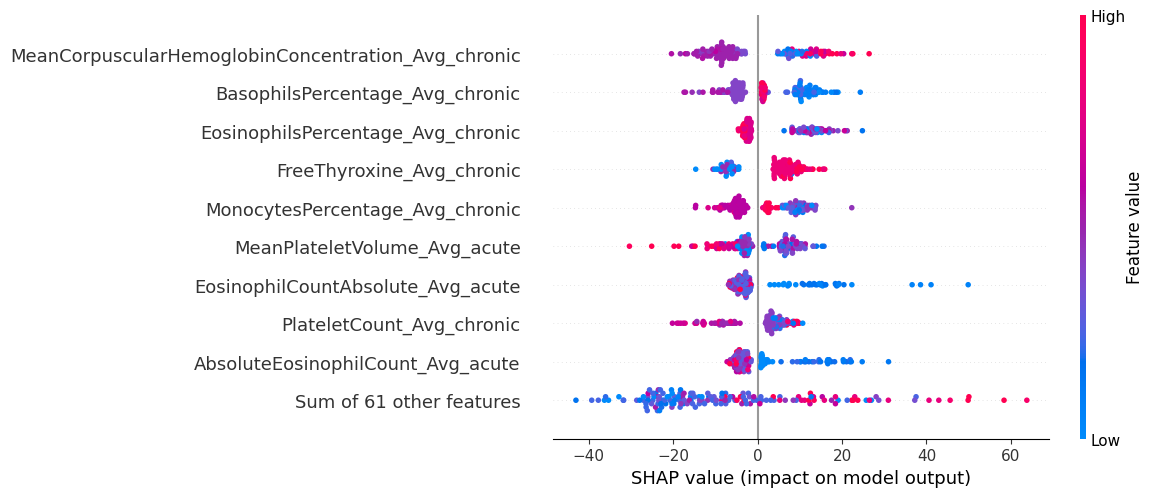

cohna1
48.10528809547424


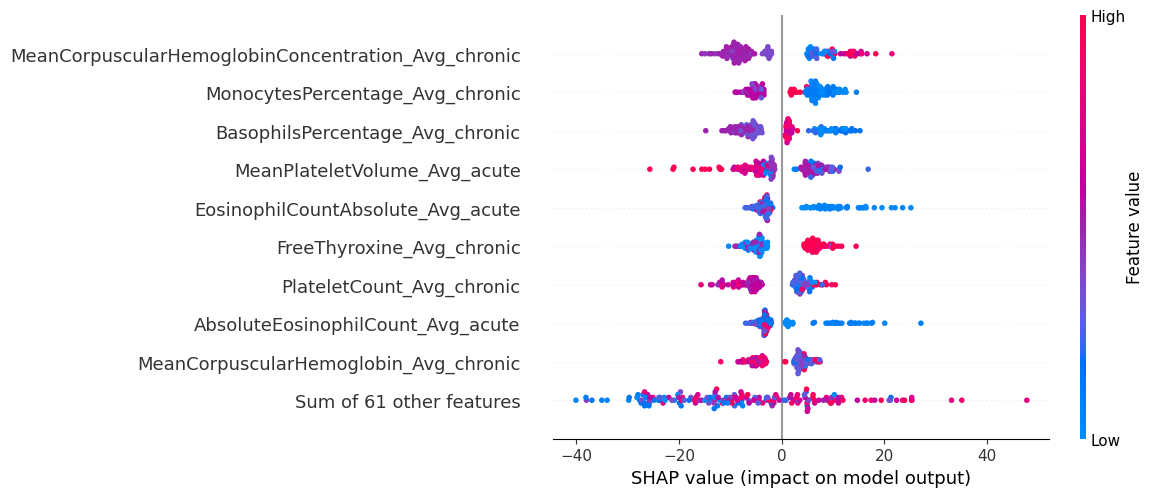

cohna2
48.10528809547424


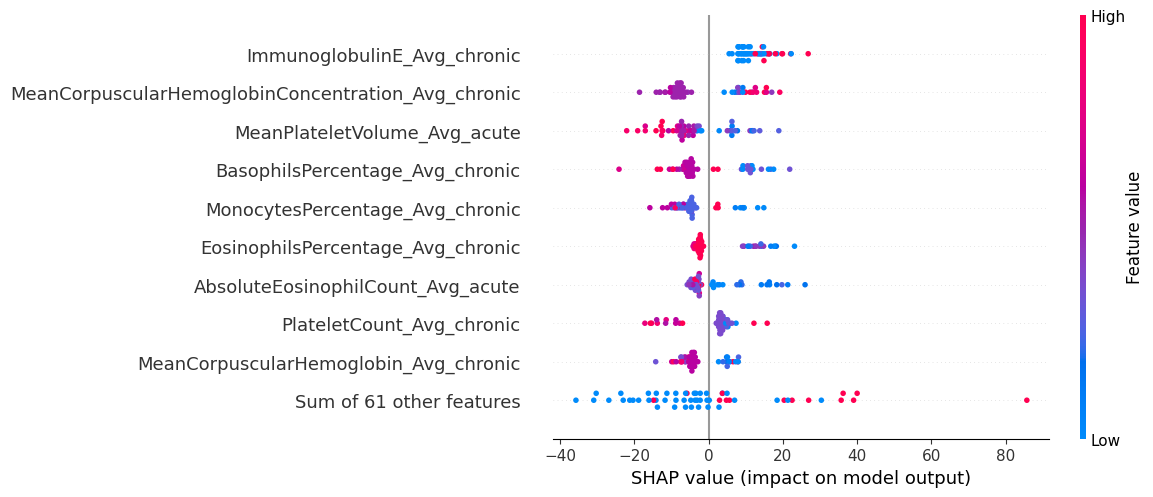

cohib
48.10528809547424


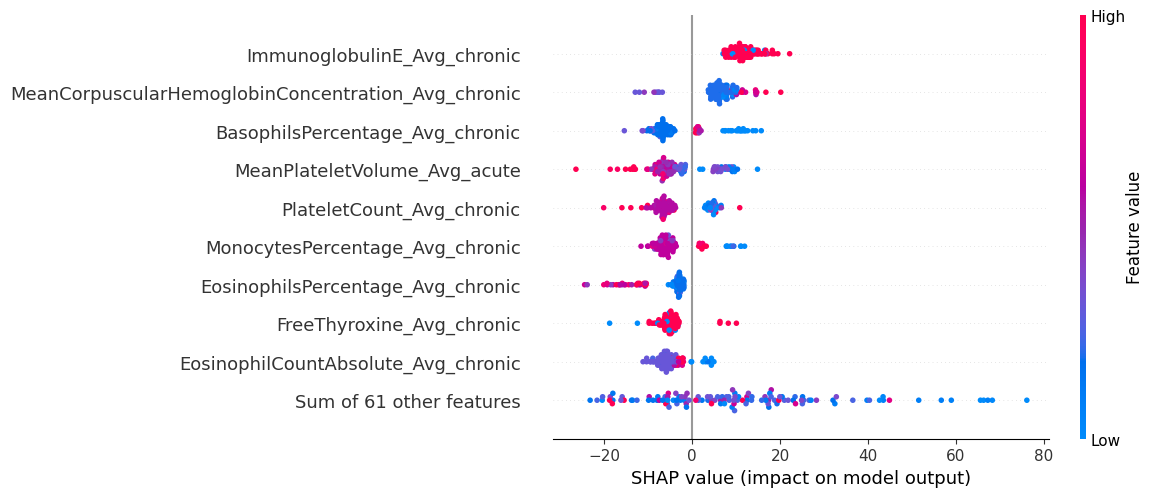

In [5]:
for co in cohorts.cohorts.keys():
    #PRINT BASE VALUES
    print(co)
    print(cohorts.cohorts[co].base_values[0])
    shap.plots.beeswarm(cohorts.cohorts[co], max_display=10)